In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
file_path = "Base Analyse.xlsx"
list_index=['FEDL01','GRDIIDX','VIX','Best Div Yld']
list_index_pct=['SPX','EURUSD','VIX']
periods = [('2007-08-01', '2009-06-30'),('2020-01-31','2021-04-30'),('2024-03-01','2024-08-08')]


NameError: name 'sheet_name' is not defined

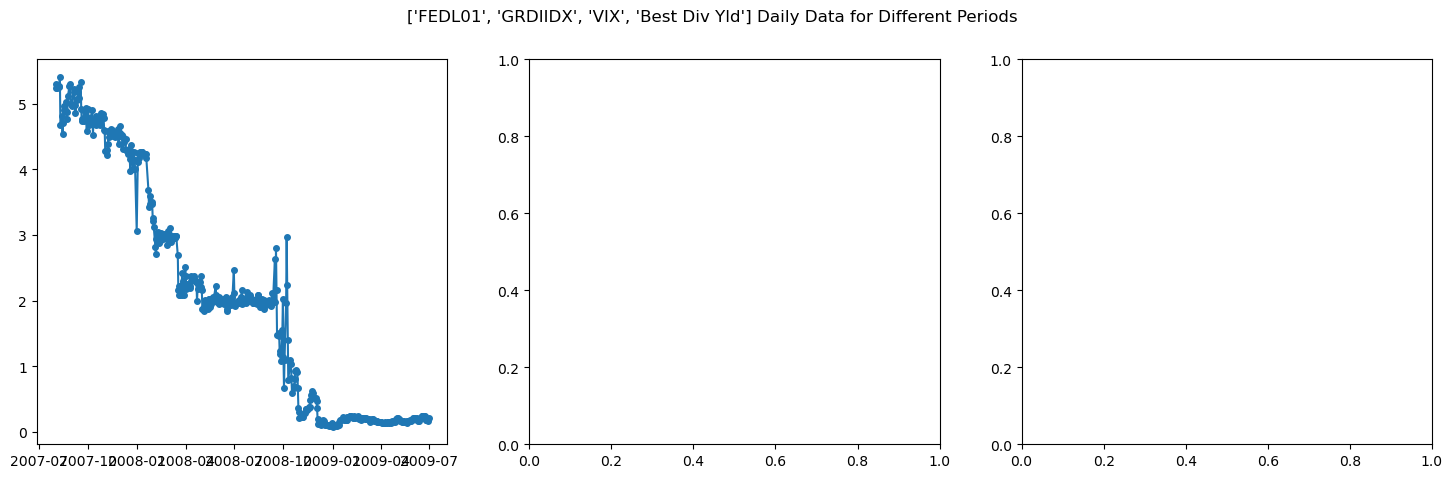

In [32]:
for i in range(len(list_index)):
    data = pd.read_excel(file_path, sheet_name=list_index[i], index_col='Date')
    data.index = pd.to_datetime(data.index)  
    """
    

    for start, end in periods:
        period_data = data.loc[start:end]

        # plot
        plt.figure(figsize=(10, 5))
        plt.plot(period_data.index, period_data[period_data.columns[0]], label=f'{start} to {end}')
        plt.title(f'{list_index[i]} Data from {start} to {end}')
        plt.xlabel('Date')
        plt.ylabel(list_index[i])
        plt.legend()
        plt.grid(True)
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(periods), figsize=(18, 5), sharey=False) 
    fig.suptitle(f'{list_index} Daily Data for Different Periods')

    for i, (start, end) in enumerate(periods):
        if start in data.index and end in data.index:
            period_data = data.loc[start:end]

            # 绘制子图
            axes[i].plot(period_data.index, period_data[period_data.columns[0]], marker='o', linestyle='-', markersize=4)
            axes[i].set_title(f'{sheet_name}From {start} to {end}')
            axes[i].set_xlabel('Date')
            axes[i].grid(True)

        else:
            print(f"Date range {start} to {end} not found in data for index {list_index}.")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()
    plt.close()

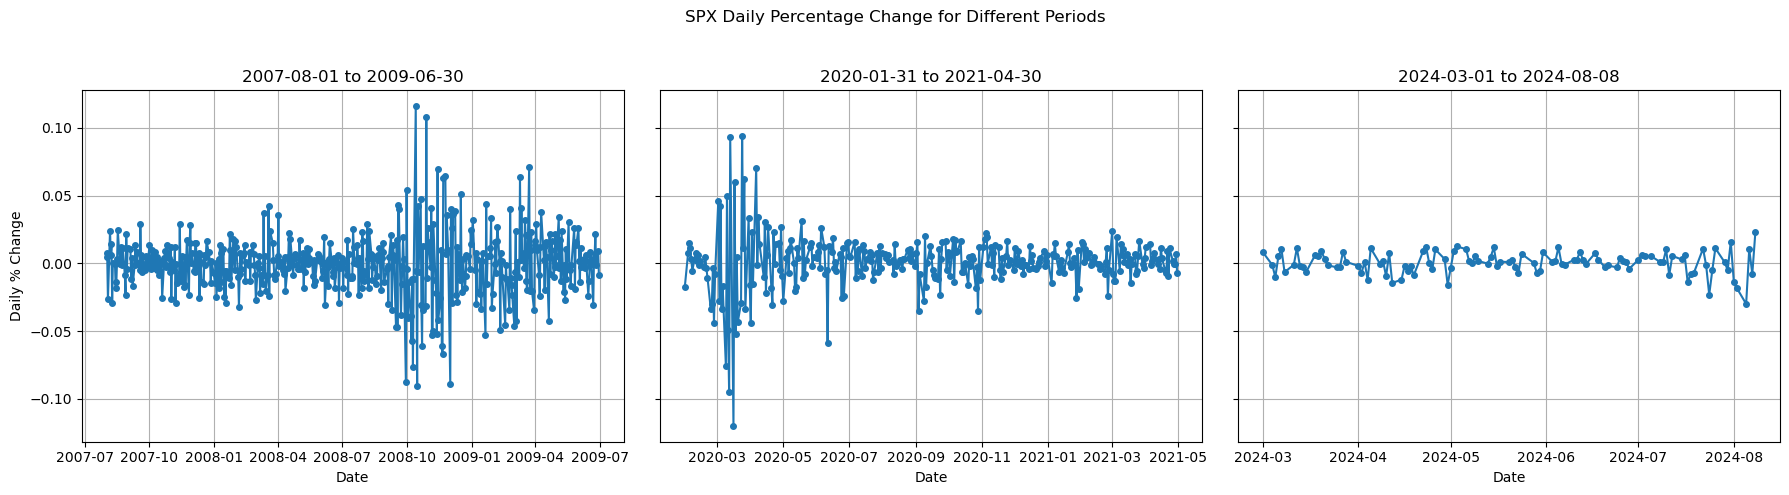

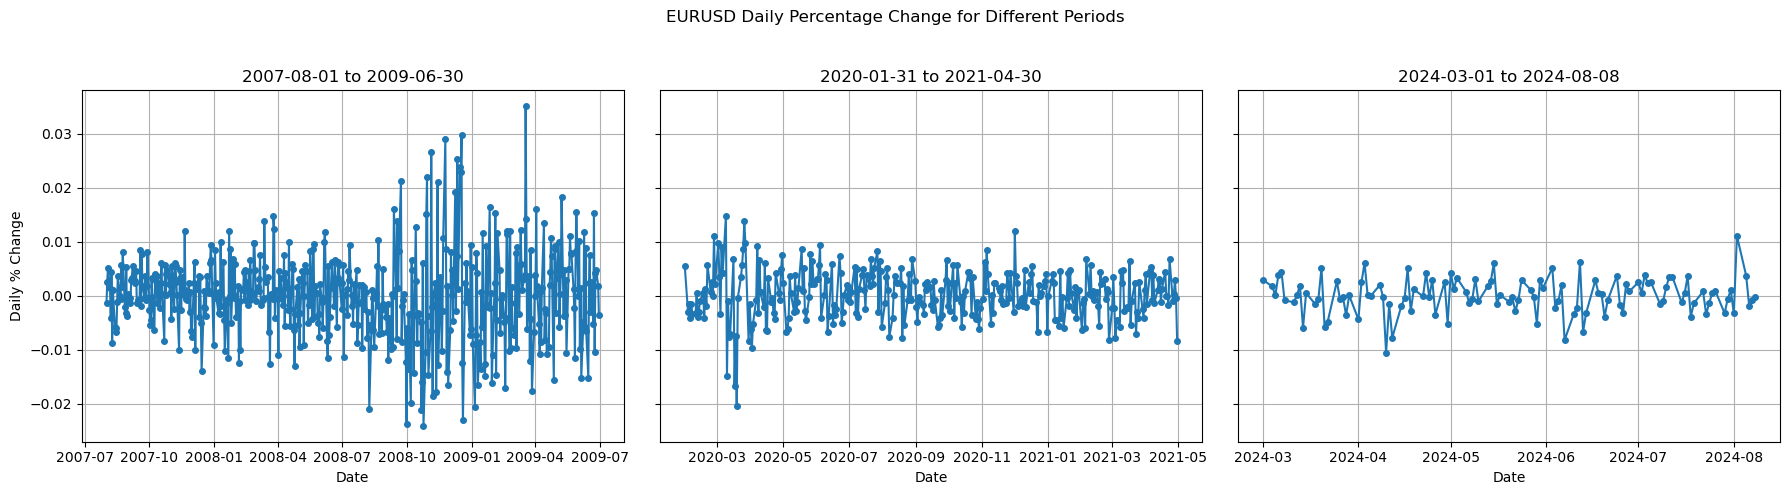

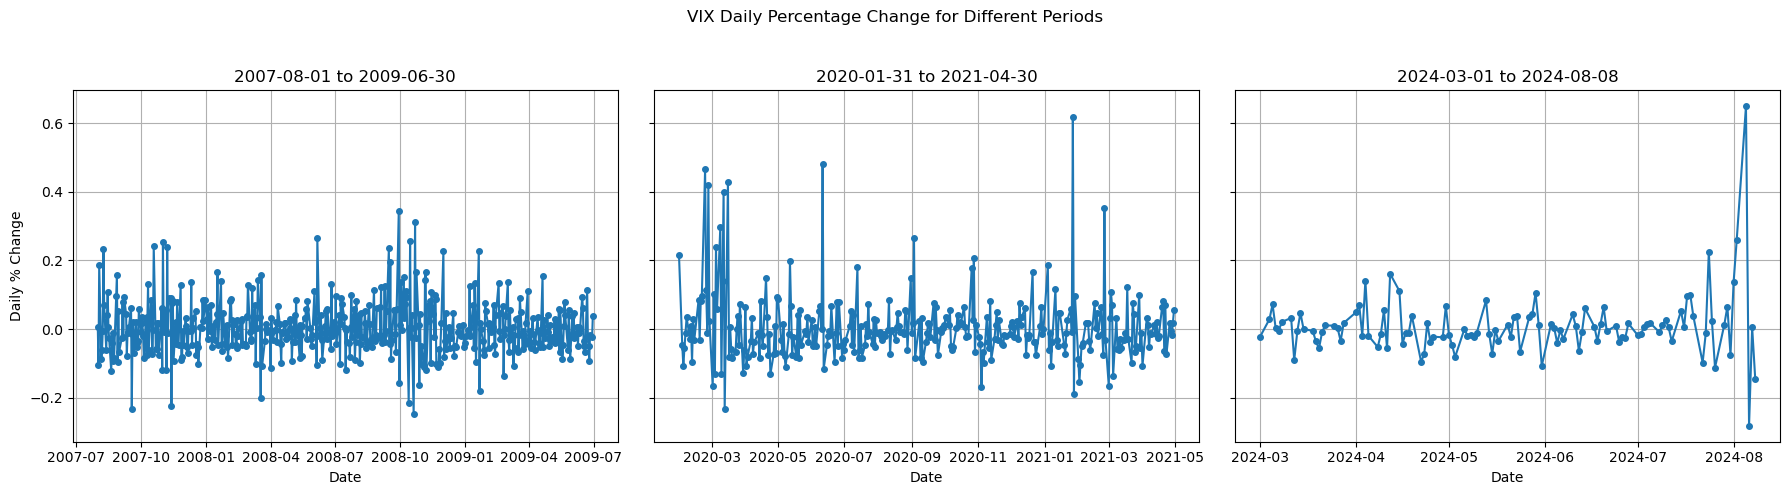

In [33]:
for index in list_index_pct:
    data = pd.read_excel(file_path, sheet_name=index, index_col='Date')
    data.index = pd.to_datetime(data.index) 

    # get pct change
    daily_pct_change = data.pct_change()

    # plot
    fig, axes = plt.subplots(nrows=1, ncols=len(periods), figsize=(18, 5), sharey=True) 
    fig.suptitle(f'{index} Daily Percentage Change for Different Periods')

    for i, (start, end) in enumerate(periods):
        if pd.to_datetime(start) in daily_pct_change.index and pd.to_datetime(end) in daily_pct_change.index:
            period_data = daily_pct_change.loc[start:end]

            axes[i].plot(period_data.index, period_data[period_data.columns[0]], marker='o', linestyle='-', markersize=4)
            axes[i].set_title(f'{start} to {end}')
            axes[i].set_xlabel('Date')
            axes[i].grid(True)

            if i == 0:  
                axes[i].set_ylabel('Daily % Change')

        else:
            print(f"Date range {start} to {end} not found in data for index {index}.")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()
    plt.close()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from itertools import combinations

np.random.seed(0)
X = np.random.rand(100, 10)  
y = (np.sum(X, axis=1) > 5).astype(int) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def test_combinations(X_train, X_test, y_train, y_test):
    best_accuracy = 0
    best_combination = None


    for i in range(1, 11):
        for combo in combinations(range(10), i):

            X_train_combo = X_train[:, combo]
            X_test_combo = X_test[:, combo]

          
            model = LogisticRegression()
            model.fit(X_train_combo, y_train)

            
            y_pred = model.predict(X_test_combo)
            accuracy = accuracy_score(y_test, y_pred)

            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = combo

    return best_accuracy, best_combination


best_accuracy, best_combination = test_combinations(X_train, X_test, y_train, y_test)
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Combination of Features: {best_combination}")